# Review and data Selection Criteria
I selected the customer demographics because this will give me an insight into knowing the customers and will make it easier to link them to their patterns and basic information about them, transaction history is also very important component to understand the customers more and learn their spanding habit, their spending style, and trends, customer service history will help me understand how the customer service dept has either played a positive or negative role in retaining the customers each time they had complaints or issues are raised. How were their issues resolved, how fast were they attended to, did they have a good experience?, online activity and churn status. All of these will be significant in understanding the customer churn and making future predictions and improvements that will set LBG on a greater part

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
sns.set(style="whitegrid")

In [2]:
#Load datasets
xls = pd.ExcelFile("Customer_Churn_Data_Large.xlsx")

xls.sheet_names
# df.head()
# df.info()
# df.describe()

['Customer_Demographics',
 'Transaction_History',
 'Customer_Service',
 'Online_Activity',
 'Churn_Status']

In [3]:
#Rename datasets
customer_demo=pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name="Customer_Demographics")
trans_hist=pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name="Transaction_History")
cust_service=pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name="Customer_Service")
online_activity=pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name="Online_Activity")
churn_status=pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name="Churn_Status")

# Inspecting Data
Customer Demography; Customer ID, Age, marital status and income level will give us some insights about the customers
Transaction History; Customer ID, amount spent, - we can drop transaction id since customer id is a unique column in Both Customer Demography and transaction history 
All the features on customer_service will be quite important in the prediction, interaction id can be dropped
Online Activity: Customer id, Interation type, interaction date and resolution status are important factors to look into as well
Churn Status: Churn status is quite important in our model classification


In [4]:
#check through datasets
customer_demo.info()
trans_hist.info()
cust_service.info()
online_activity.info()
churn_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       5054 non-null   int64         
 1   TransactionID    5054 non-null   int64         
 2   TransactionDate  5054 non-null   datetime64[ns]
 3   AmountSpent      5054 non-null   float64       
 4   ProductCategory  5054 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory 

In [5]:
# Further inspection
customer_demo.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [6]:
# Summary statistics
customer_demo.describe()

,CustomerID,Age
count,1000.000000,1000.000000
mean,500.500000,43.267000
std,288.819436,15.242311
min,1.000000,18.000000
25%,250.750000,30.000000
50%,500.500000,43.000000
75%,750.250000,56.000000
max,1000.000000,69.000000


In [7]:
#Sample Data
customer_demo.sample()


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
49,50,50,F,Single,Low


In [8]:

#Standardise Column names
WORDS = [
    "customer", "id", "transaction", "date", "amount", "spent", "product",
    "category", "interaction", "type", "resolution", "status", "last",
    "login", "frequency", "service", "usage", "churn", "marital", "income", "status", "level"
]


import re

def smart_split(col):
    col = col.lower()
    for w in WORDS:
        col = col.replace(w, w + "_")
    col = re.sub(r'_+', '_', col)      # collapse multiple underscores
    col = col.strip('_')               # remove leading/trailing underscores
    return col

def clean_all(df):
    df.columns = [smart_split(c) for c in df.columns]
    return df

customer_demo = clean_all(customer_demo)
trans_hist = clean_all(trans_hist)
cust_service = clean_all(cust_service)
online_activity = clean_all(online_activity)
churn_status = clean_all(churn_status)



print(customer_demo.columns)
print(trans_hist.columns)
print(cust_service.columns)
print(online_activity.columns)
print(churn_status.columns)



Index(['customer_id', 'age', 'gender', 'marital_status', 'income_level'], dtype='object')
Index(['customer_id', 'transaction_id', 'transaction_date', 'amount_spent',
       'product_category'],
      dtype='object')
Index(['customer_id', 'interaction_id', 'interaction_date', 'interaction_type',
       'resolution_status'],
      dtype='object')
Index(['customer_id', 'last_login_date', 'login_frequency', 'service_usage'], dtype='object')
Index(['customer_id', 'churn_status'], dtype='object')


In [9]:
# Print column names in each dataset
for name, df in {
    "customer_demo": customer_demo,
    "trans_hist": trans_hist,
    "cust_service": cust_service,
    "online_activity": online_activity,
    "churn_status": churn_status
}.items():
    print(name, df.columns.tolist())


customer_demo ['customer_id', 'age', 'gender', 'marital_status', 'income_level']
trans_hist ['customer_id', 'transaction_id', 'transaction_date', 'amount_spent', 'product_category']
cust_service ['customer_id', 'interaction_id', 'interaction_date', 'interaction_type', 'resolution_status']
online_activity ['customer_id', 'last_login_date', 'login_frequency', 'service_usage']
churn_status ['customer_id', 'churn_status']


In [10]:
#Check for duplicate values in churn status

churn_status['customer_id'].duplicated().sum()



np.int64(0)

In [11]:
#check for misssing customer id values
for name, df in {
    "customer_demo": customer_demo,
    "trans_hist": trans_hist,
    "cust_service": cust_service,
    "online_activity": online_activity,
    "churn_status": churn_status
}.items():
    print(name, df['customer_id'].isna().sum())


customer_demo 0
trans_hist 0
cust_service 0
online_activity 0
churn_status 0


In [12]:
#Check for mismatched customer ids
base_ids = set(churn_status['customer_id'])

for name, df in {
    "customer_demo": customer_demo,
    "trans_hist": trans_hist,
    "cust_service": cust_service,
    "online_activity": online_activity
}.items():
    missing = df[~df['customer_id'].isin(base_ids)]
    print(name, len(missing))



customer_demo 0
trans_hist 0
cust_service 0
online_activity 0


In [13]:
#Inspect data types
for name, df in {
    "customer_demo": customer_demo,
    "trans_hist": trans_hist,
    "cust_service": cust_service,
    "online_activity": online_activity,
    "churn_status": churn_status
}.items():
    print(name)
    print(df.dtypes)
    print()


customer_demo
customer_id        int64
age                int64
gender            object
marital_status    object
income_level      object
dtype: object

trans_hist
customer_id                  int64
transaction_id               int64
transaction_date    datetime64[ns]
amount_spent               float64
product_category            object
dtype: object

cust_service
customer_id                   int64
interaction_id                int64
interaction_date     datetime64[ns]
interaction_type             object
resolution_status            object
dtype: object

online_activity
customer_id                 int64
last_login_date    datetime64[ns]
login_frequency             int64
service_usage              object
dtype: object

churn_status
customer_id     int64
churn_status    int64
dtype: object



In [14]:
#Quick Overview of each dataset
datasets = {
    "Customer Demographics": customer_demo,
    "Transaction History": trans_hist,
    "Customer Service": cust_service,
    "Online Activity": online_activity,
    "Churn Status": churn_status
}

for name, df in datasets.items():
    print(f"\n===== {name} =====")
    print(df.shape)
    print(df.dtypes)
    print(df.isna().sum())



===== Customer Demographics =====
(1000, 5)
customer_id        int64
age                int64
gender            object
marital_status    object
income_level      object
dtype: object
customer_id       0
age               0
gender            0
marital_status    0
income_level      0
dtype: int64

===== Transaction History =====
(5054, 5)
customer_id                  int64
transaction_id               int64
transaction_date    datetime64[ns]
amount_spent               float64
product_category            object
dtype: object
customer_id         0
transaction_id      0
transaction_date    0
amount_spent        0
product_category    0
dtype: int64

===== Customer Service =====
(1002, 5)
customer_id                   int64
interaction_id                int64
interaction_date     datetime64[ns]
interaction_type             object
resolution_status            object
dtype: object
customer_id          0
interaction_id       0
interaction_date     0
interaction_type     0
resolution_status    0

In [15]:
#Inspect Unique Customers
for name, df in datasets.items():
    print(name, "unique customers:", df['customer_id'].nunique())


Customer Demographics unique customers: 1000
Transaction History unique customers: 1000
Customer Service unique customers: 668
Online Activity unique customers: 1000
Churn Status unique customers: 1000


# Customer Service Unique customers
From the inspection I observed that a total of 668 customers reached out to customer service, that means 332 never contacted customer service that could mean they never had issues

In [16]:
#Check for missing ids or duplicates
print("Duplicates in churn_status:", churn_status['customer_id'].duplicated().sum())

for name, df in datasets.items():
    print(name, "missing customer_id:", df['customer_id'].isna().sum())

Duplicates in churn_status: 0
Customer Demographics missing customer_id: 0
Transaction History missing customer_id: 0
Customer Service missing customer_id: 0
Online Activity missing customer_id: 0
Churn Status missing customer_id: 0


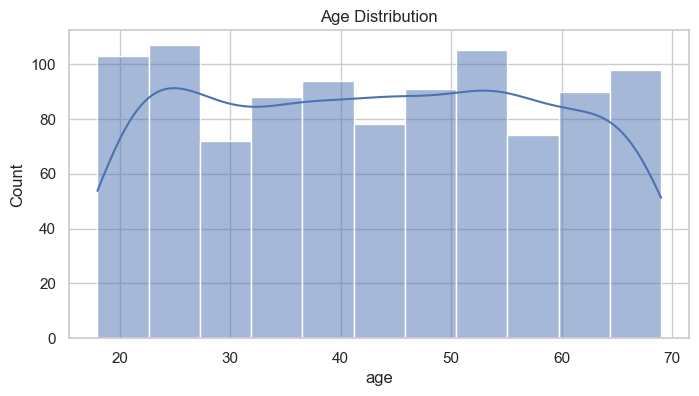

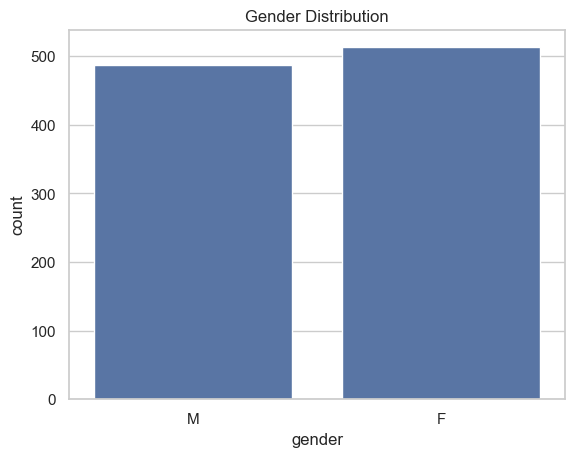

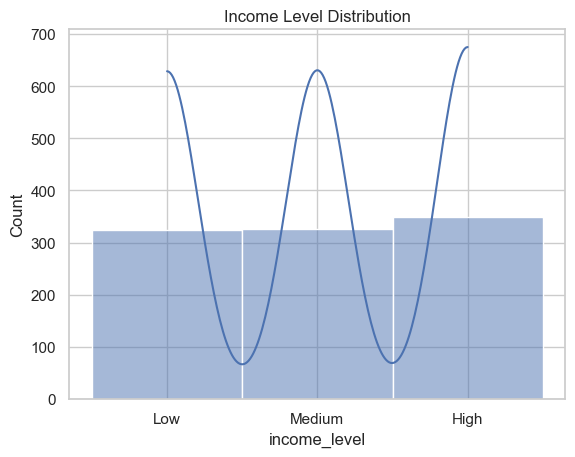

In [17]:
#UNVARIATE EDA(DEMOGRAHICS)

plt.figure(figsize=(8,4))
sns.histplot(customer_demo['age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(data=customer_demo, x='gender')
plt.title("Gender Distribution")
plt.show()

sns.histplot(customer_demo['income_level'], kde=True)
plt.title("Income Level Distribution")
plt.show()



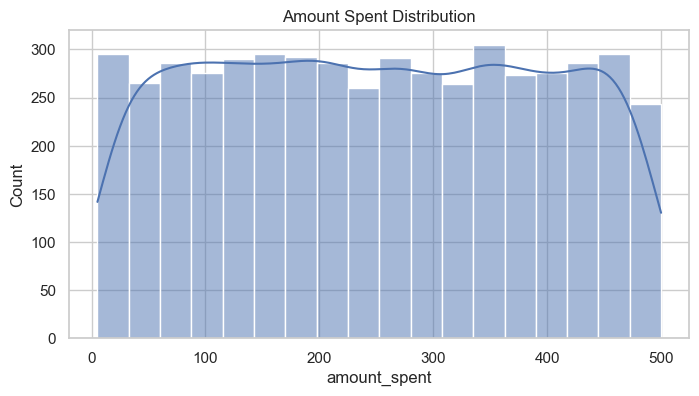

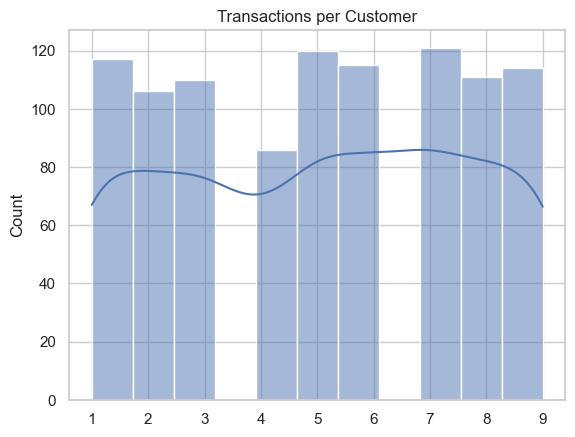

In [18]:
#Univariate Transaction History
plt.figure(figsize=(8,4))
sns.histplot(trans_hist['amount_spent'], kde=True)
plt.title("Amount Spent Distribution")
plt.show()

#Transaction per customer
txn_counts = trans_hist.groupby('customer_id').size()

sns.histplot(txn_counts, kde=True)
plt.title("Transactions per Customer")
plt.show()


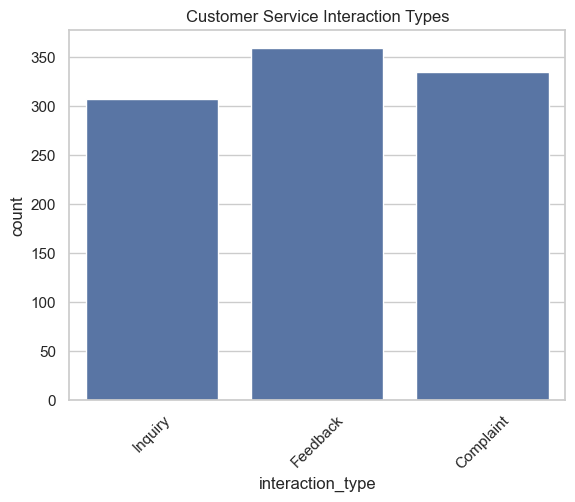

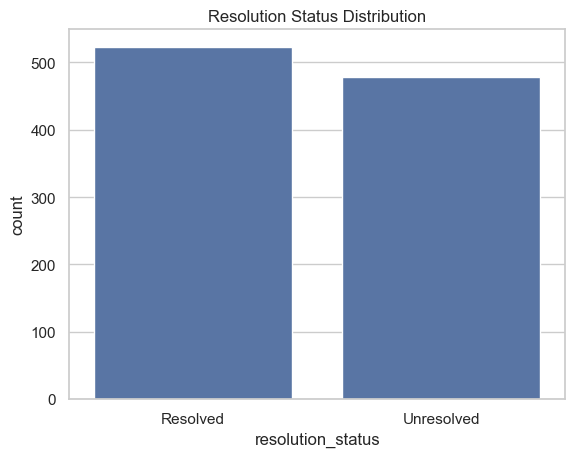

In [19]:
#Customer Service EDA
sns.countplot(data=cust_service, x='interaction_type')
plt.title("Customer Service Interaction Types")
plt.xticks(rotation=45)
plt.show()

#Resolution Status
sns.countplot(data=cust_service, x='resolution_status')
plt.title("Resolution Status Distribution")
plt.show()



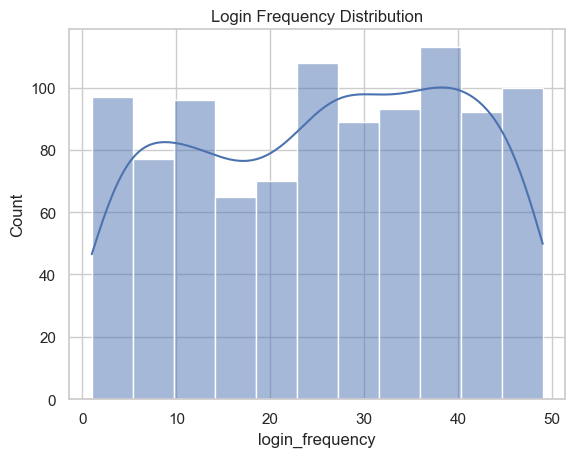

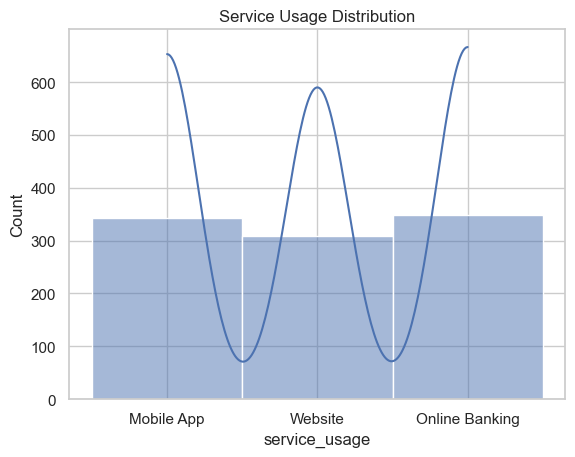

In [20]:
#Online Activity-Login Frequency
sns.histplot(online_activity['login_frequency'], kde=True)
plt.title("Login Frequency Distribution")
plt.show()

#Service Usage
sns.histplot(online_activity['service_usage'], kde=True)
plt.title("Service Usage Distribution")
plt.show()


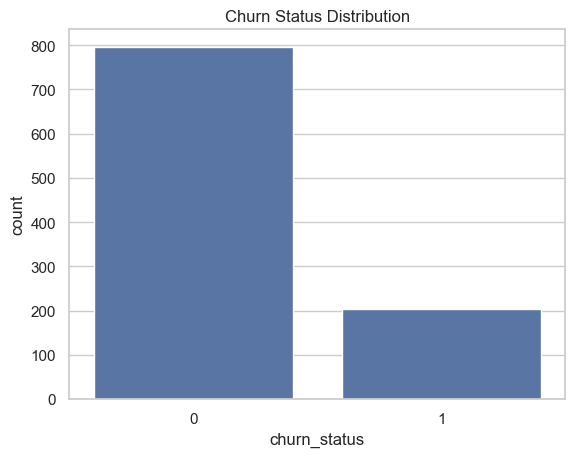

churn_status
0    0.796
1    0.204
Name: proportion, dtype: float64


In [21]:
#Churn rate
sns.countplot(data=churn_status, x='churn_status')
plt.title("Churn Status Distribution")
plt.show()

print(churn_status['churn_status'].value_counts(normalize=True))


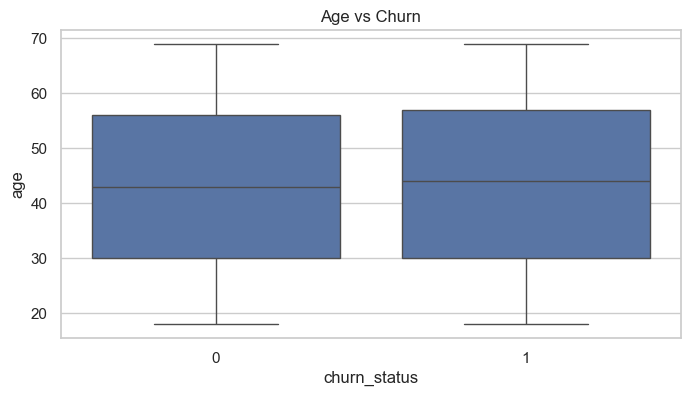

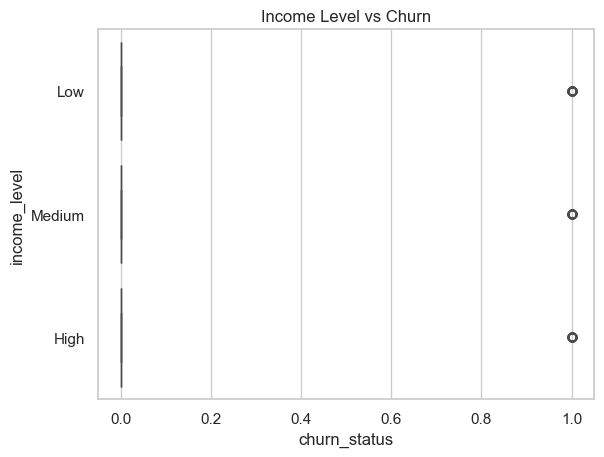

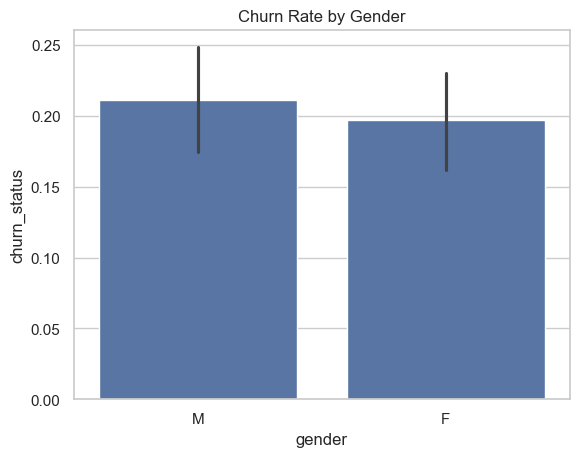

In [22]:
#Bivariate EDA
merged = churn_status.merge(customer_demo, on='customer_id', how='left')

#Bivariate EDA (Feature vs Churn)
plt.figure(figsize=(8,4))
sns.boxplot(data=merged, x='churn_status', y='age')
plt.title("Age vs Churn")
plt.show()

#churn rate by income level
sns.boxplot(data=merged, x='churn_status', y='income_level')
plt.title("Income Level vs Churn")
plt.show()

# # % churn by income level
# churn_by_income = (
#     df.groupby('income_level')['churn_status']
#       .mean() * 100
# )

# print(churn_by_income)

#Gender vs churn
sns.barplot(
    data=merged,
    x='gender',
    y='churn_status'
)
plt.title("Churn Rate by Gender")
plt.show()



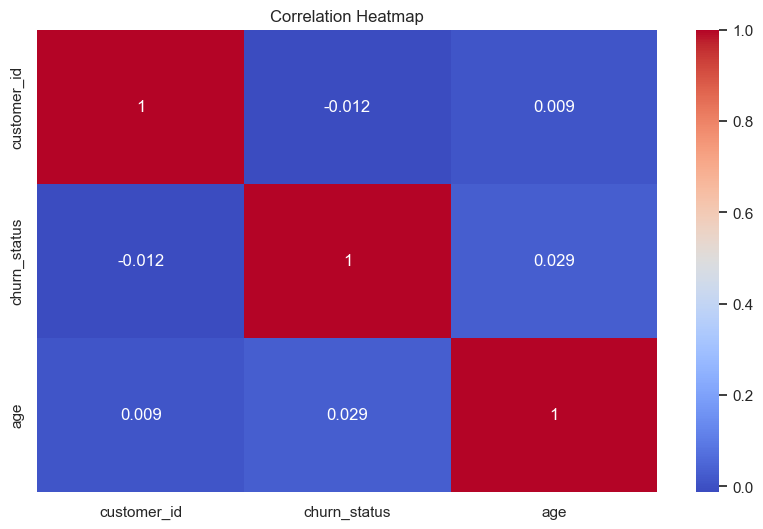

In [23]:
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(merged.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


The above heat map shows that age and customer id of -0.012 and 0.029 does not show any clear impact on the churn rate. They are not strong (indicators) variables of churn in this situation. 

# Cleaning

In [24]:

# customer_demo
for name, df in datasets.items():
    print(f"\n{name} missing values:")
    print(df.isna().sum())



Customer Demographics missing values:
customer_id       0
age               0
gender            0
marital_status    0
income_level      0
dtype: int64

Transaction History missing values:
customer_id         0
transaction_id      0
transaction_date    0
amount_spent        0
product_category    0
dtype: int64

Customer Service missing values:
customer_id          0
interaction_id       0
interaction_date     0
interaction_type     0
resolution_status    0
dtype: int64

Online Activity missing values:
customer_id        0
last_login_date    0
login_frequency    0
service_usage      0
dtype: int64

Churn Status missing values:
customer_id     0
churn_status    0
dtype: int64


In [25]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    return outliers

datasets = {
    "customer_demo": customer_demo,
    "trans_hist": trans_hist,
    "cust_service": cust_service,
    "online_activity": online_activity
}

numeric_cols = {
    "customer_demo": ['age'],
    "trans_hist": ['amount_spent'],
    "online_activity": ['login_frequency']
}

for name, df in datasets.items():
    print(f"\n=== {name} ===")
    for col in numeric_cols.get(name, []):
        outliers = detect_outliers_iqr(df, col)
        print(f"{col}: {len(outliers)} outliers detected")

        #income level and service usage 



=== customer_demo ===
age: 0 outliers detected

=== trans_hist ===
amount_spent: 0 outliers detected

=== cust_service ===

=== online_activity ===
login_frequency: 0 outliers detected


In [26]:
customer_demo['income_level'].unique()


array(['Low', 'Medium', 'High'], dtype=object)

In [27]:
def zscale(df, col):
    df[col] = (df[col] - df[col].mean()) / df[col].std()

# Customer Demographics
zscale(customer_demo, 'age')

#ordinal encoding
income_map = {
    'Low': 1,
    'Medium': 2,
    'High': 3}
customer_demo['income_level'] = customer_demo['income_level'].map(income_map)

zscale(customer_demo, 'income_level')

# Transaction History
zscale(trans_hist, 'amount_spent')

# Online Activity
zscale(online_activity, 'login_frequency')
# zscale(online_activity, 'service_usage')


In [28]:


#one-hot-encoding for categorical variables
online_activity = pd.get_dummies(
    online_activity,
    columns=['service_usage'],
  drop_first=False)



In [29]:
# check result of one-hot-encoding
online_activity

,customer_id,last_login_date,login_frequency,service_usage_Mobile App,service_usage_Online Banking,service_usage_Website
0,1,2023-10-21,0.575415,True,False,False
1,2,2023-12-05,-1.487768,False,False,True
2,3,2023-11-15,-1.630057,False,False,True
3,4,2023-08-25,-1.701201,False,False,True
4,5,2023-10-27,1.073424,False,False,True
...,...,...,...,...,...,...
995,996,2023-01-29,0.859991,True,False,False
996,997,2023-04-01,-1.487768,True,False,False
997,998,2023-07-10,1.500290,False,False,True
998,999,2023-01-08,-0.207172,False,False,True


In [30]:
print(online_activity.columns.tolist())
print(customer_demo.columns.tolist())
customer_demo


['customer_id', 'last_login_date', 'login_frequency', 'service_usage_Mobile App', 'service_usage_Online Banking', 'service_usage_Website']
['customer_id', 'age', 'gender', 'marital_status', 'income_level']


,customer_id,age,gender,marital_status,income_level
0,1,1.229013,M,Single,-1.247207
1,2,1.425834,M,Married,-1.247207
2,3,-1.657688,M,Single,-1.247207
3,4,-1.460868,M,Widowed,-1.247207
4,5,-1.460868,M,Divorced,-0.029231
...,...,...,...,...,...
995,996,0.704158,F,Single,-1.247207
996,997,-1.592081,M,Widowed,1.188744
997,998,0.244910,M,Married,-1.247207
998,999,-1.329654,M,Widowed,1.188744


,customer_id,last_login_date,login_frequency,service_usage_Mobile App,service_usage_Online Banking,service_usage_Website
0,1,2023-10-21,0.575415,True,False,False
1,2,2023-12-05,-1.487768,False,False,True
2,3,2023-11-15,-1.630057,False,False,True
3,4,2023-08-25,-1.701201,False,False,True
4,5,2023-10-27,1.073424,False,False,True
...,...,...,...,...,...,...
995,996,2023-01-29,0.859991,True,False,False
996,997,2023-04-01,-1.487768,True,False,False
997,998,2023-07-10,1.500290,False,False,True
998,999,2023-01-08,-0.207172,False,False,True


In [36]:
# confirm key column
for name, df in datasets.items():
    print(name, '→', 'customer_id' in df.columns)

customer_demo → True
trans_hist → True
cust_service → True
online_activity → True


In [37]:
churn_status

,customer_id,churn_status
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
995,996,0
996,997,0
997,998,0
998,999,0


In [38]:
#aggregate non-demographic datasets
# Transaction history
trans_agg = trans_hist.groupby('customer_id').agg({
    'amount_spent': ['sum', 'mean', 'count']
})
trans_agg.columns = ['total_spent', 'avg_spent', 'num_transactions']
trans_agg.reset_index(inplace=True)


In [52]:
# customer service interactions
cust_service_agg = cust_service.groupby('customer_id').agg({
    'interaction_type': 'count'
})
cust_service_agg.rename(columns={'interaction_type': 'num_interactions'}, inplace=True)
cust_service_agg.reset_index(inplace=True)
cust_service_agg['num_interactions'] = cust_service_agg['num_interactions'].astype(int)


In [53]:
#online activity
online_agg = online_activity.groupby('customer_id').agg({
    'login_frequency': 'mean',
    # plus any one-hot encoded service_usage columns
})
online_agg.reset_index(inplace=True)


In [54]:
# merge all datasets into one
model_df = customer_demo.copy()

model_df = model_df.merge(trans_agg, on='customer_id', how='left')
model_df = model_df.merge(cust_service_agg, on='customer_id', how='left')
model_df = model_df.merge(online_agg, on='customer_id', how='left')
model_df = model_df.merge(churn_status, on='customer_id', how='left')



In [55]:
# handle missing values
model_df.fillna(0, inplace=True)

#final check
model_df.info()
model_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1000 non-null   int64  
 1   age               1000 non-null   float64
 2   gender            1000 non-null   object 
 3   marital_status    1000 non-null   object 
 4   income_level      1000 non-null   float64
 5   total_spent       1000 non-null   float64
 6   avg_spent         1000 non-null   float64
 7   num_transactions  1000 non-null   int64  
 8   num_interactions  1000 non-null   float64
 9   login_frequency   1000 non-null   float64
 10  churn_status      1000 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 86.1+ KB


,customer_id,age,gender,marital_status,income_level,total_spent,avg_spent,num_transactions,num_interactions,login_frequency,churn_status
0,1,1.229013,M,Single,-1.247207,1.165495,1.165495,1,1.0,0.575415,0
1,2,1.425834,M,Married,-1.247207,-1.458912,-0.208416,7,1.0,-1.487768,1
2,3,-1.657688,M,Single,-1.247207,1.397081,0.232847,6,1.0,-1.630057,0
3,4,-1.460868,M,Widowed,-1.247207,-2.363759,-0.472752,5,2.0,-1.701201,0
4,5,-1.460868,M,Divorced,-0.029231,-0.029306,-0.003663,8,0.0,1.073424,0


In [112]:
# cust_service_agg['num_interactions'].head(20)

# MODEL PREDICTION AND EVALUATION

In [71]:
# Split into features and target
X = model_df.drop('churn_status', axis=1)
y = model_df['churn_status']

In [78]:
categorical_columns = ['gender', 'marital_status']

X_train = pd.get_dummies(X_train, columns=categorical_columns)
X_test = pd.get_dummies(X_test, columns=categorical_columns)

# Align columns to ensure train and test have the same features
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

#Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [92]:
#Train model - logistic regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)



,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [96]:
# make prediction
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print(y_pred[:10])
print(y_prob[:10])


[0 0 0 0 0 0 0 0 0 0]
[0.12429254 0.17602692 0.17380875 0.15563239 0.24144141 0.26847824
 0.26791657 0.15542319 0.17461085 0.17521467]


In [120]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))



Confusion Matrix:
[[152   7]
 [ 38   3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       159
           1       0.30      0.07      0.12        41

    accuracy                           0.78       200
   macro avg       0.55      0.51      0.49       200
weighted avg       0.70      0.78      0.72       200


ROC-AUC Score:
0.4916398220585979


In [98]:
# retrain logistic with class_weight=imbalanced
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_prob))


[[76 83]
 [19 22]]
              precision    recall  f1-score   support

           0       0.80      0.48      0.60       159
           1       0.21      0.54      0.30        41

    accuracy                           0.49       200
   macro avg       0.50      0.51      0.45       200
weighted avg       0.68      0.49      0.54       200

0.4620340543028072


In [82]:
#Cross-Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
scores.mean()


np.float64(0.5806369804249434)

In [114]:
# Hyper-tuning
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

search = RandomizedSearchCV(
    rf, param_grid, cv=5, scoring='roc_auc', n_iter=10
)
search.fit(X_train, y_train)

best_model = search.best_estimator_


In [117]:
# Model Evaluation
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score
)

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


[[152   7]
 [ 38   3]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       159
           1       0.30      0.07      0.12        41

    accuracy                           0.78       200
   macro avg       0.55      0.51      0.49       200
weighted avg       0.70      0.78      0.72       200

ROC-AUC: 0.4916398220585979


# Comparing both logistic and randaom forest, to see which model evalustes best

In [118]:
#train logistic with clas balancing
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

log_pred = log_reg.predict(X_test)
log_prob = log_reg.predict_proba(X_test)[:, 1]


In [119]:
#train random forest with class balancing
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]



In [102]:
# Evaluate both models with the same metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

print("=== Logistic Regression ===")
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))
print("ROC-AUC:", roc_auc_score(y_test, log_prob))

print("\n=== Random Forest ===")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_prob))


=== Logistic Regression ===
[[76 83]
 [19 22]]
              precision    recall  f1-score   support

           0       0.80      0.48      0.60       159
           1       0.21      0.54      0.30        41

    accuracy                           0.49       200
   macro avg       0.50      0.51      0.45       200
weighted avg       0.68      0.49      0.54       200

ROC-AUC: 0.4620340543028072

=== Random Forest ===
[[158   1]
 [ 41   0]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       159
           1       0.00      0.00      0.00        41

    accuracy                           0.79       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.63      0.79      0.70       200

ROC-AUC: 0.48550391164289003


In [139]:
# importances.head(10)


In [124]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE


In [127]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [128]:
print(np.bincount(y_train))
print(np.bincount(y_train_sm))


[637 163]
[637 637]


In [129]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

log_pred = log_reg.predict(X_test)
log_prob = log_reg.predict_proba(X_test)[:, 1]

In [130]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)
rf.fit(X_train_sm, y_train_sm)

rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

In [131]:
print("=== Logistic Regression (SMOTE) ===")
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))
print("ROC-AUC:", roc_auc_score(y_test, log_prob))

print("\n=== Random Forest (SMOTE) ===")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_prob))

=== Logistic Regression (SMOTE) ===
[[81 78]
 [23 18]]
              precision    recall  f1-score   support

           0       0.78      0.51      0.62       159
           1       0.19      0.44      0.26        41

    accuracy                           0.49       200
   macro avg       0.48      0.47      0.44       200
weighted avg       0.66      0.49      0.54       200

ROC-AUC: 0.4724651020095107

=== Random Forest (SMOTE) ===
[[152   7]
 [ 40   1]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       159
           1       0.12      0.02      0.04        41

    accuracy                           0.77       200
   macro avg       0.46      0.49      0.45       200
weighted avg       0.66      0.77      0.70       200

ROC-AUC: 0.5060592115355116


In [137]:
#INSTALL LIBRARIES
#!pip install xgboost lightgbm

#IMPORT MODELS
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#TRAIN XGBoost

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight= (len(y_train) - sum(y_train)) / sum(y_train),  # imbalance handling
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:, 1]

#train lightGBM

lgb = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=42
)

lgb.fit(X_train, y_train)

lgb_pred = lgb.predict(X_test)
lgb_prob = lgb.predict_proba(X_test)[:, 1]

#EVALUATE BOTH MODELS
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

print("=== XGBoost ===")
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print("ROC-AUC:", roc_auc_score(y_test, xgb_prob))

print("\n=== LightGBM ===")
print(confusion_matrix(y_test, lgb_pred))
print(classification_report(y_test, lgb_pred))
print("ROC-AUC:", roc_auc_score(y_test, lgb_prob))


[LightGBM] [Info] Number of positive: 163, number of negative: 637
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 893
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [138]:
#FUTURE IMPORTANCE
xgb.feature_importances_

lgb.feature_importances_

array([1539, 1306,  316, 1418, 1462,  649,  282, 1366,  234,  136,  109,
        109], dtype=int32)